In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import seaborn                 as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# This statement allow to display plots without asking to 
%matplotlib inline

# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('../data/processed/ckd_normalized.csv')
df['status'] = df['status'].map({'ckd': 1, 'notckd': 0})
df = df[['hemo', 'sg', 'sc', 'rbcc', 'pcv', 'htn', 'dm', 'bp', 'age', 'status']]
df.head(20)

,hemo,sg,sc,rbcc,pcv,htn,dm,bp,age,status
0,1.104287,0.75,-0.369018,0.755196,0.718996,1.0,1.0,0.407224,-0.312038,1
1,-0.405493,0.75,-0.962740,-0.179655,0.026486,0.0,0.0,-2.804763,-2.168536,1
2,-0.993463,0.25,0.200059,-0.763301,-0.753787,0.0,1.0,0.407224,0.596178,1
3,-0.440746,0.00,1.060675,-0.576596,-0.644304,1.0,0.0,-0.409254,-0.312038,1
4,-0.299254,0.25,-0.147267,0.153075,-0.311797,0.0,0.0,0.407224,-0.127053,1
5,-0.084657,0.50,-0.495964,-0.052220,0.140467,1.0,1.0,1.071282,0.459613,1
6,-0.012510,0.25,2.010450,-0.016130,-0.199659,0.0,0.0,-0.409254,1.018770,1
7,-0.012510,0.50,-0.495964,0.556680,0.718996,0.0,1.0,-0.082521,-1.574325,1
8,-0.580945,0.50,0.271729,-0.470382,-0.534134,1.0,1.0,1.623877,-0.064187,1
9,-1.027272,0.75,1.552927,-0.791159,-0.970623,1.0,1.0,1.071282,-0.000730,1


In [3]:
y = df['status'] #as the df comes from a csv, y is treated as str. We convert it to simplify future calculations
X = df.drop(['status'], axis=1) # drop all varribales that are not related to the analysis 

### KNN

In [4]:
# Split normalized data Xn into training and validation sets
# test_size=0.2 means 20% of the data goes to validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_test.shape, y_test.shape)

Training set shape: (320, 9) (320,)
Validation set shape: (80, 9) (80,)


Optimal k found: 5
Cross-Validation Accuracy: 0.9696


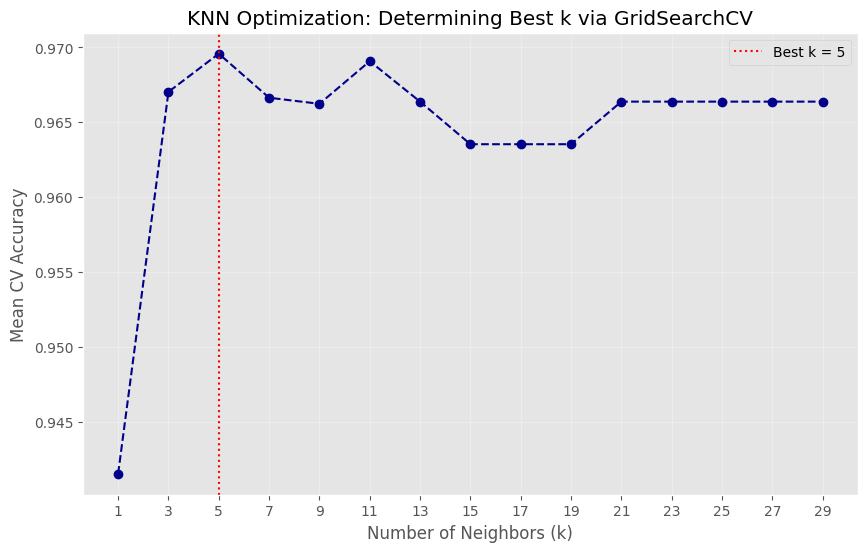

In [ ]:
# Define the KNN model and Parameter Grid
# We test k values from 1 to 30
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 31, 2)}

# Perform GridSearchCV with 10-fold Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

# Extract Results
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
results = grid_search.cv_results_['mean_test_score']
#final_accuracy = grid_search.score(X_test, y_test)

print(f"Optimal k found: {best_k}")
print(f"Cross-Validation Accuracy: {best_score:.4f}")
#print(f"Final unbiased accuracy: {final_accuracy}")

# Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 31, 2), results, marker='o', linestyle='--', color='darkblue')
plt.title('KNN Optimization: Determining Best k via GridSearchCV')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(np.arange(1, 31, 2))
plt.grid(True, alpha=0.3)
plt.axvline(best_k, color='red', linestyle=':', label=f'Best k = {best_k}')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.98      0.90      0.94        50

    accuracy                           0.93        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



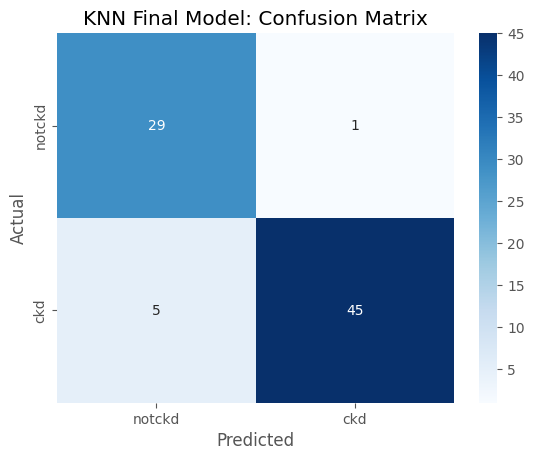

In [6]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Evaluate on validation set
y_pred = knn_final.predict(X_test)
test_accuracy = knn_final.score(X_test, y_test)
# Metrics

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['notckd', 'ckd'], yticklabels=['notckd', 'ckd'])
plt.title('KNN Final Model: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#print("Validation accuracy with best k:", test_accuracy)
print(classification_report(y_test, y_pred))

### Support Vector Machine

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


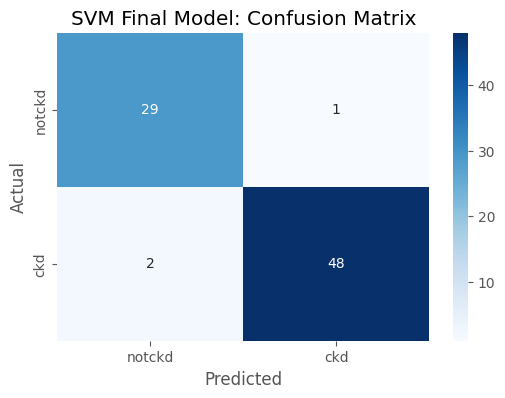

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.98      0.96      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [7]:
# Define the parameter grid
# We test different Kernels, C values, and Gamma values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'sigmoid']
}

# Set up GridSearchCV
# Using 'f1' or 'balanced_accuracy' is often better than pure 'recall' 
# to ensure the model doesn't just predict "ckd" for everyone.
grid_search = GridSearchCV(
    SVC(probability=True, random_state=42), 
    param_grid, 
    cv=10, 
    scoring='f1', 
    n_jobs=-1
)

# Run the search
grid_search.fit(X_train, y_train)

# Evaluation on the Hold-out Test Set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#print(f"Test Recall: {recall_score(y_test, y_pred):.4f}")
#print("Test Precision:", precision_score(y_test, y_pred))
#print("F-score:", f1_score(y_test, y_pred))

# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['notckd', 'ckd'], yticklabels=['notckd', 'ckd'])
plt.title('SVM Final Model: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

### Gradient Boosting with Imputed Data

              precision    recall  f1-score   support

         ckd       1.00      0.97      0.98        30
      notckd       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



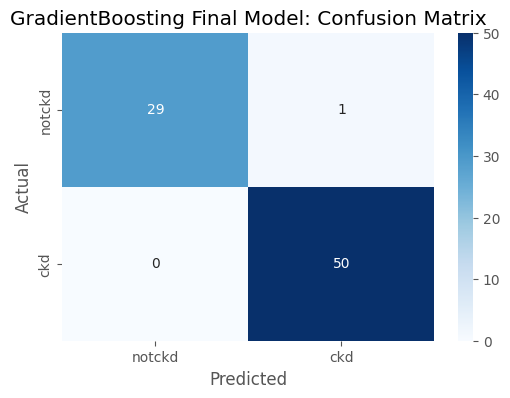

In [ ]:
# Load and Prepare Data
df_imp = pd.read_csv('../data/processed/ckd_imputed.csv')
df_imp['status'] = df_imp['status'].map({'ckd': 1, 'notckd': 0})
df_imp = df_imp[['hemo', 'sg', 'sc', 'rbcc', 'pcv', 'htn', 'dm', 'bp', 'age', 'status']]


X = df_imp.drop(columns=['status'])
y = df_imp['status']

# Split into Training (80%) and Test (20%)
# 'stratify' ensures both sets have the same percentage of CKD vs NotCKD
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Run Grid Search on the Training Set ONLY
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Final Evaluation on the Unseen Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['notckd', 'ckd'], yticklabels=['notckd', 'ckd'])
plt.title('GradientBoosting Final Model: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
#print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['ckd', 'notckd']))

### Gradient Boosting with Missing Values

Best Parameters: {'l2_regularization': 0, 'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 200, 'max_leaf_nodes': 15}

Classification Report:
              precision    recall  f1-score   support

         ckd       0.96      1.00      0.98        50
      notckd       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



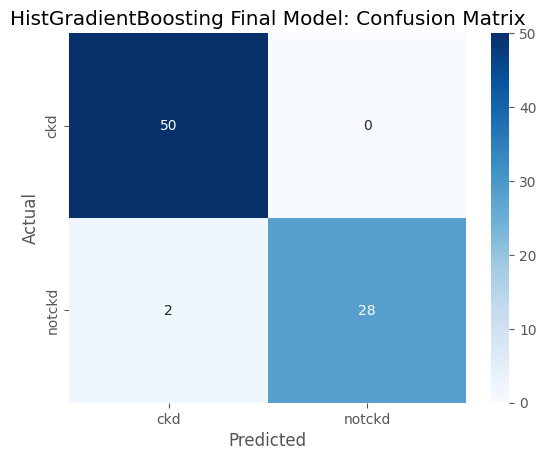

In [ ]:
# Load the dataset 
# Note: If using the original dataset with NaNs, HistGB will handle them automatically.
df_ori = pd.read_csv('../data/processed/ckd_imputed.csv')
df_ori = df_ori[['hemo', 'sg', 'sc', 'rbcc', 'pcv', 'htn', 'dm', 'bp', 'age', 'status']]
le = LabelEncoder()
df_ori['status_encoded'] = le.fit_transform(df_ori['status'])

X = df_ori.drop(columns=['status', 'status_encoded'])
y = df_ori['status_encoded']

# Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Initialize HistGradientBoostingClassifier
# This model is specifically chosen for its native handling of missing values.
hgb_clf = HistGradientBoostingClassifier(random_state=42)

# Define Parameter Grid for GridSearchCV
param_grid = {
    'max_iter': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, None],
    'l2_regularization': [0, 0.1, 1.0],
    'max_leaf_nodes': [15, 31]
}

# Run Grid Search with 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=hgb_clf,
    param_grid=param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize Results (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('HistGradientBoosting Final Model: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### CONCLUSION  

Gradient Boosting with Imputed Data (0.99) > Gradient Boosting with Missing Values (0.97) > SVM (0.96) > KNN (0.93)